<a href="https://colab.research.google.com/github/PankajHemnani/Simulation-of-text-data-transmission-over-an-AWGN/blob/main/Simulation%20of%20text%20data%20transmission%20over%20an%20AWGN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def v_xor(bit0,bit1):
    if(bit0==bit1):
        return '0'
    else:
        return '1'

# SOURCE ENCODING

In [22]:
try:
    test = open("test.txt","r")
except IOError:
    print("Please provide correct file path")
TextToBeEncoded = ""
for i in test.read():
  TextToBeEncoded = TextToBeEncoded + i

In [38]:
distinct=[]
list1=[]
list_dec=[]
for i in TextToBeEncoded:
    if i not in distinct:
        distinct.append(i)
    else:
        pass

for i in distinct:
    n=TextToBeEncoded.count(i)
    t=(i,n)
    list1.append(t)
print(list1)

list_sorted=sorted(list1, key=lambda y : y[1])

a=len(list1)
for i in range(a):       # Reversing the list to arrange in Decreasing order of no of occurence
    list_dec.append(list_sorted[a-i-1])

#print('\n\n----------------- FIXED LENGTH ENCODING PART-------------------------------------------------------------')
print("\n\nFixed length Coding")
index=0
Encode={}                              #Blank Dictionary
grey=''

for i in list_dec:                   #Encoding dictionary: Assigns 5 bit binary to each character in the text
    index+=1
    binary='{0:06b}'.format(index)
    Encode.update({i[0]:binary})
# for i in Encode:
    # print(i,Encode[i])
    
    #print(f'{i[0]}     \t\t{binary}     \t\t{grey}')
# print(Encode)     #------->Uncomment to see the codes
CodedWord = ''
print("\nCoded bits are---->")
for i in TextToBeEncoded:                                     # Encoding is done for the given string
    CodedWord = CodedWord + Encode.get(i)       
    
print(CodedWord)

[('H', 4), ('a', 132), ('v', 12), ('i', 109), ('n', 103), ('g', 18), (' ', 261), ('s', 99), ('t', 110), ('r', 76), ('e', 118), ('d', 49), ('j', 1), ('o', 87), ('u', 48), ('y', 17), ('2', 3), ('0', 6), ('9', 2), ('w', 12), ('h', 58), ('5', 2), ('1', 4), ('c', 55), ('(', 2), (')', 2), ('f', 23), ('l', 53), ('b', 16), ('k', 13), ('U', 1), ('K', 1), ('m', 36), ('P', 5), (',', 25), ('4', 2), ('6', 1), ('N', 5), ('D', 1), ('I', 6), ('T', 9), ('M', 5), ('p', 34), ('q', 1), ('.', 10), ('[', 2), (']', 2), ('C', 6), ('S', 4), ('\n', 4), ('-', 3), ('x', 2), ('3', 1), ('E', 1), ('R', 1), ('O', 1), ("'", 1), ('A', 1), ('L', 1)]


Fixed length Coding

Coded bits are---->
1001000000100110000001010001100100110000010001110001000000100010010001000000110011010000010001010001000001110000011110110010000011100010010001100000110101000000010001010001100000011001100111010111011011100000010101110001010001000010100000011011011000110111010000010000100010110010010000110001110000011011001001101000110111010000010010

# CHANNEL ENCODER

In [39]:
def viterbi_encoder(inputs):
    
    #shift register encoder
    s_reg = ['0','0','0']
    obs = []
    for i in range(len(inputs)):
        #shifting the bits to right
        s_reg[2]=s_reg[1]
        s_reg[1]=s_reg[0]
        #inserting input
        s_reg[0]= inputs[i]
        state = s_reg[0]+ s_reg[1]
        #encoded bits
        thisState = v_xor(v_xor(s_reg[0],s_reg[1]),s_reg[2])+ v_xor(s_reg[0],s_reg[2])
        obs.append(thisState)
       
        output = ''
        for sym in obs:
            output = output + sym
    return output
    
ChannelEncoded = viterbi_encoder(CodedWord)
print(f'Channel encoded signal ->\n{ChannelEncoded}')

Channel encoded signal ->
11101111101100000000111011110101110000000011100010110011010111111011110101110000001110110011011001110011101100000000111011001110111110110011101100000000110101111101010010110000001110110011100010110011101100000011011001110000001101101001000101111110110000001101100111001110111110110011010111000000110101001000101100000000001110110011100010110011010111000000001101011111010111110110010010000110010001010001100111000000001110001000011001110011100010110011101100001110001011000000001101010001010001011100110101000110010010110000001110110000111011001110000101111110111110110000110101110011011001110000001101010001011111101111010100101100110101000110010010110000001110111110001011000000111000100010000101110000001110111110110000111011111011000000001110001011110101111110111110110000111011000011011001110011011001111101011100000000111011000011010111001101010010110000001110111110110000000011010111000000001110110011101100001110001011000000110101110000001110001000100010110000111011

# MODULATION

In [40]:
binbits=np.array([])
for i in ChannelEncoded:
  binbits=np.append(binbits,int(i))

bpskout = 2*binbits-1

# CHANNEL NOISE

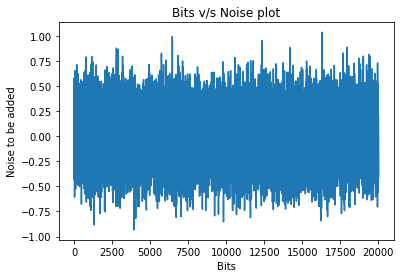

In [41]:
AWGN = np.random.normal(0,0.25,len(binbits)) # be careful of the standard deviation
X = [x for x in range(len(binbits))]
plt.plot(X, AWGN)
plt.xlabel("Bits")
plt.ylabel("Noise to be added")
plt.title("Bits v/s Noise plot")
plt.show()

Txbits = bpskout
Rxbits = Txbits + AWGN

# DEMODULATION

In [42]:
Sxbits=[]
for i in Rxbits:
  if(i<=0):
    Sxbits.append(0)
  else:
    Sxbits.append(1)
print('Demodulated--->')
demodulated_data = ''.join([str(i) for i in Sxbits])
print(demodulated_data)

Demodulated--->
111011111011000000001110111101011100000000111000101100110101111110111101011100000011101100110110011100111011000000001110110011101111101100111011000000001101011111010100101100000011101100111000101100111011000000110110011100000011011010010001011111101100000011011001110011101111101100110101110000001101010010001011000000000011101100111000101100110101110000000011010111110101111101100100100001100100010100011001110000000011100010000110011100111000101100111011000011100010110000000011010100010100010111001101010001100100101100000011101100001110110011100001011111101111101100001101011100110110011100000011010100010111111011110101001011001101010001100100101100000011101111100010110000001110001000100001011100000011101111101100001110111110110000000011100010111101011111101111101100001110110000110110011100110110011111010111000000001110110000110101110011010100101100000011101111101100000000110101110000000011101100111011000011100010110000001101011100000011100010001000101100001110110000110101

# CHANNEL DECODER

In [43]:
def hamming_distance(x, y):
    # determines hamming distancer between symbol x and symbol y 
    count = 0
    # assunption, x and y of same length
    for i in range(len(x)):
        if x[i] != y[i]:
            count += 1
    return count
  
def viterbi_decoder(code):
    result = ''
    A=''
    segmented_code=[]
    for i in range(0,len(code),2):
        A=A+str(code[i])+str(code[i+1])
        segmented_code.append(A)    
        A=''
    in_out_dict= {
        ('00', '00') : '00',
        ('00', '01') : '11',
        ('01', '10') : '10',
        ('01', '11') : '01',
        ('10', '00') : '10',
        ('10', '01') : '00',
        ('11', '10') : '01',
        ('11', '11') : '10',
    }
    all_possible_next_states = {
    '00' : ('00', '01'),
    '01' : ('10', '11'),
    '10' : ('00', '01'),
    '11' : ('10', '11')
    }
    first_state = '00'
    current_state = first_state
    for in_state in segmented_code:
        next_states = all_possible_next_states[current_state] # tupple of next possible states
        dist = [0, 0] # for storing hamming distance from next state to input_state
        for i in range(len(next_states)):
            # dist[i] = hamming_distance(in_state, next_states[i])
            dist[i] = hamming_distance(in_state, in_out_dict.get((current_state, next_states[i])))

        bit = str(np.argmin(dist)) # finds the correspoonding bit for the path with min hamming distance
        result = result + bit
        current_state = next_states[int(bit)] # saves the next current state for propagation in trellis diagram
    return result

In [44]:
channel_decoded = viterbi_decoder(demodulated_data)
print('Channel decoded --->')
print(channel_decoded)

Channel decoded --->
1001000000100110000001010001100100110000010001110001000000100010010001000000110011010000010001010001000001110000011110110010000011100010010001100000110101000000010001010001100000011001100111010111011011100000010101110001010001000010100000011011011000110111010000010000100010110010010000110001110000011011001001101000110111010000010010100000101010110000010010000100100000010100110010010000100001110001110011000000100001100011010000010010000001100000010001000010100000110000010101010000100001100101100001110000010010000100100000010001000010100000110000010010010001010110000000110010010000011110100010100011000000010001010001100000010001000010100000110000010110000001010011000011000000100100110000110000011110010000100011110000100001100011010000010010000100100000011001000001010011110000100010110010100000100011000000011000000010010000100011010000110001110010100100010000011010101110000111010000010101100001010011000010000011110000110001000010010000110001110000011011001001101011100

# SOURCE DECODER

In [45]:
new= open("DecodedText.dat","w")

In [46]:
Decode = {value:key for key, value in Encode.items()}
result = ''
for i in range(0, len(channel_decoded), 6):
    symbol = channel_decoded[i:i+6]
    # print(symbol) # debug
    # print(Decode.get(symbol, '#'))
    new.write(Decode.get(symbol, '#'))
    result = result + Decode.get(symbol, '#')
print("Final Decoded signal: ")
print(result)

Final Decoded signal: 
Having started its journey in 2009 with 510 acres (210 ha) of grassland on the banks of the river Uhl in the village Kamand of Himachal Pradesh, 460 kilometres (290 mi) away from New Delhi, the Indian Institute of Technology Mandi has made impressive and rapid strides towards creating a remarkable and unique campus in the challenging yet serene Himalayan setup.[14][15] The campus is split up internally in two halves namely, the North Campus and the South Campus. Proper communication has been facilitated by the college for students, staffs and faculty for communication between north and south campus.

Sports, co-curricular and extra-curricular activities are also of high importance for the institute. In addition to the existing indoor badminton courts, swimming pool, table tennis hall, football and cricket fields and gymnasium, the institute is creating one of its kind pavilion, a hockey ground with kiosk, and also setting up new tennis, volleyball and basketball 

# RESULT

In [47]:
Wrongdetection = 0
for i in range(len(channel_decoded)):
  if(channel_decoded[i]!=CodedWord[i]):
    Wrongdetection += 1
print("Incorrect Detection: ",Wrongdetection)

Incorrect Detection:  0
